In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import octopus_ml as oc

In [2]:
# Titanic train set data
df = pd.read_csv('data/Kaggle_titanic_train.csv')
features = ['Age', 'Sex', 'Embarked', 'Pclass','Fare','Survived'] # Only five features
train_df = df[features]
target= 'Survived'

# Data Preprocessing

        
# Categorical features
def categorical_features(df):
    categorical_features=[]
    for c in df.columns:
        col_type = df[c].dtype
        if col_type == 'object' or col_type.name == 'category':
            df[c] = df[c].astype(str).astype('category')
            categorical_features.append(c)
    print ('Categorical features: ', categorical_features)
    
categorical_features(train_df)

        
X = train_df[train_df.columns.difference([target])]
y = train_df[target]

Categorical features:  ['Sex', 'Embarked']


<ipython-input-2-78c819934bc9>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[c] = df[c].astype(str).astype('category')


In [8]:
# train a model with octopus-ml
params = {
        'boosting_type': 'gbdt',
        'objective': 'binary',
        'metric': 'auc',
        'force_col_wise': True,
        'verbose':-1,
}

metrics = oc.cv_adv(X,y,0.5,10,shuffle=True,params=params, method='full')

--------------------------- Running Cross-Validation - classification, mode: full ---------------------------
-> Starting 5-folds CV - Shuffle: True


0it [00:00, ?it/s]C:\Anaconda3\lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
C:\Anaconda3\lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Anaconda3\lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
C:\Anaconda3\lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
C:\Anaconda3\lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Anaconda3\lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict i

[1]	training's auc: 0.903665	valid_1's auc: 0.846509
[2]	training's auc: 0.908079	valid_1's auc: 0.85639
[3]	training's auc: 0.910899	valid_1's auc: 0.855007
[4]	training's auc: 0.911512	valid_1's auc: 0.85751
[5]	training's auc: 0.915772	valid_1's auc: 0.857576
[6]	training's auc: 0.920565	valid_1's auc: 0.864625
[7]	training's auc: 0.920478	valid_1's auc: 0.861528
[8]	training's auc: 0.920436	valid_1's auc: 0.861792
[9]	training's auc: 0.92321	valid_1's auc: 0.857839
[10]	training's auc: 0.924808	valid_1's auc: 0.866601
[1]	training's auc: 0.905945	valid_1's auc: 0.794452
[2]	training's auc: 0.906415	valid_1's auc: 0.80762
[3]	training's auc: 0.912596	valid_1's auc: 0.817313
[4]	training's auc: 0.914254	valid_1's auc: 0.820455
[5]	training's auc: 0.913714	valid_1's auc: 0.819987
[6]	training's auc: 0.916628	valid_1's auc: 0.823596
[7]	training's auc: 0.917384	valid_1's auc: 0.822727
[8]	training's auc: 0.918074	valid_1's auc: 0.827406
[9]	training's auc: 0.920473	valid_1's auc: 0.828


C:\Anaconda3\lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[1]	training's auc: 0.903844	valid_1's auc: 0.916434
[2]	training's auc: 0.913213	valid_1's auc: 0.9286
[3]	training's auc: 0.914701	valid_1's auc: 0.930328
[4]	training's auc: 0.917476	valid_1's auc: 0.931592
[5]	training's auc: 0.918454	valid_1's auc: 0.931193
[6]	training's auc: 0.919657	valid_1's auc: 0.931658
[7]	training's auc: 0.920643	valid_1's auc: 0.933387
[8]	training's auc: 0.920459	valid_1's auc: 0.933121
[9]	training's auc: 0.921468	valid_1's auc: 0.932057
[10]	training's auc: 0.922861	valid_1's auc: 0.932456
Method Name       : cv_adv
Current memory usage: 1.996457MB
Peak                : 3.178617MB
Total time taken:   208.305 ms 


C:\Anaconda3\lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Anaconda3\lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


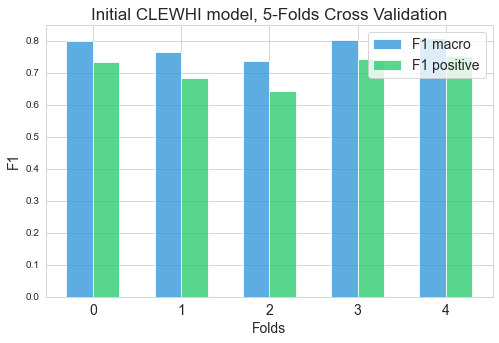

In [10]:
oc.cv_plot(metrics['f1_weighted'],metrics['f1_macro'],metrics['f1_positive'],'Initial CLEWHI model',mode='fast')

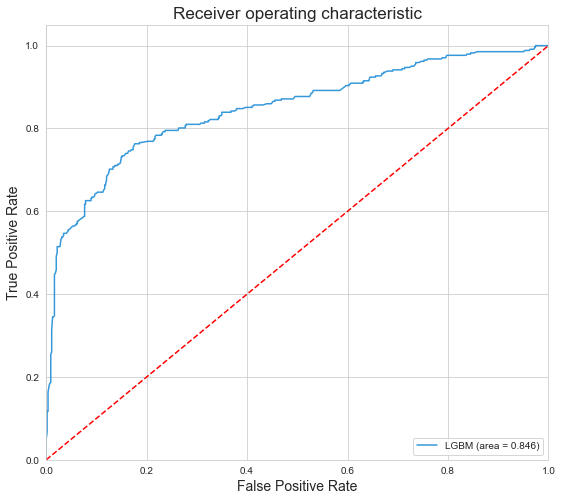

In [11]:
oc.roc_curve_plot(metrics['y'], metrics['predictions_proba'])

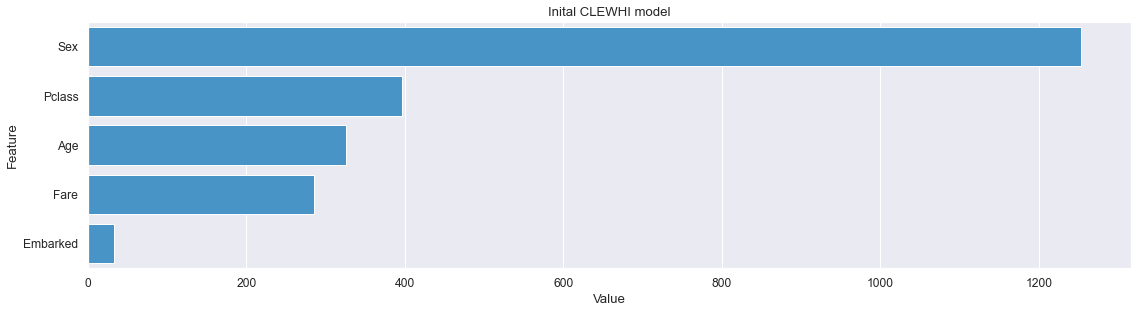

In [14]:
feature_imp_list=oc.plot_imp(metrics['final_clf'],X,'Inital CLEWHI model',num=10)

<AxesSubplot:title={'center':'Predictions Distribution'}>

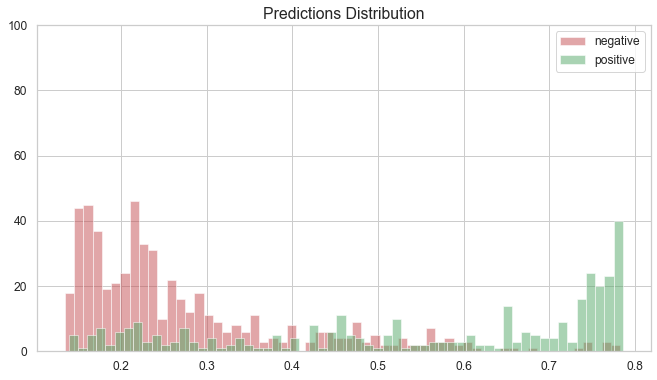

In [16]:
oc.preds_distribution(metrics['y'], metrics['predictions_proba'], bins=60,max_y=100)

In [25]:
# Save your model
import joblib
joblib.dump(metrics['final_clf'], 'model/model.pkl')
print("Model dumped!")

# Load the model that you just saved
#clf = joblib.load('model/model.pkl')

['model/model.pkl']

Model dumped!
